In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Display all columns instead of "..." truncation
pd.options.display.max_columns = None

#No scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Set plot sizes
plt.rcParams["figure.figsize"] = 10, 10

In [3]:
#Read in taxi data
taxis = pd.read_csv('nyc_taxi.csv')

In [4]:
#Read in geospatial data for New York
ny_state = gpd.read_file('ZillowNeighborhoods-NY.shp')

In [5]:
print(ny_state.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
State       579 non-null object
County      579 non-null object
City        579 non-null object
Name        579 non-null object
RegionID    579 non-null object
geometry    579 non-null object
dtypes: object(6)
memory usage: 13.6+ KB
None


In [6]:
#Locate duplicate regions
ny_state[ny_state['RegionID'].duplicated()]

,State,County,City,Name,RegionID,geometry
246,NY,New York,New York,Marble Hill,270880,POLYGON ((-73.91071526499991 40.87890143900006...
282,NY,Kings,New York,Vinegar Hill,270960,POLYGON ((-73.97901955399993 40.70666396400009...
310,NY,Bronx,New York,Rikers Island,270922,"POLYGON ((-73.8865870059999 40.79891837000008,..."
375,NY,New York,New York,Brooklyn Heights,403122,POLYGON ((-73.99610507599969 40.70422567500025...


In [7]:
#Investigate one of the duplicate regions
ny_state[ny_state['RegionID'] == '270960']

,State,County,City,Name,RegionID,geometry
281,NY,New York,New York,Vinegar Hill,270960,POLYGON ((-73.97901955399993 40.70666396400009...
282,NY,Kings,New York,Vinegar Hill,270960,POLYGON ((-73.97901955399993 40.70666396400009...


In [8]:
#Drop duplicate regions
ny_state = ny_state.loc[ny_state['RegionID'].drop_duplicates().index]

In [9]:
#Check that all regions are unique (output should be 1)
ny_state['RegionID'].nunique(dropna = True) / len(ny_state['RegionID'])

1.0

In [10]:
#Set index to region ID
ny_state['RegionID'] = ny_state['RegionID'].astype('int')
ny_state = ny_state.set_index(['RegionID'])
ny_state = ny_state.sort_index()

In [11]:
#All data come from the same state, drop state column
ny_state = ny_state.drop('State', axis=1)

In [12]:
#Convert columns to categoricals
def convert_to_categorical(df, cols):
    """Locate columns with low number of unique values and convert them to categoricals"""
    for col in cols:
        unique_vals = len(df[col].unique())
        unique_ratio = unique_vals / len(df[col])
        if unique_ratio < 0.2:
            df[col] = df[col].astype('category')
    return df

In [13]:
#List columns of ny_state Dataframe
columns = list(ny_state.select_dtypes(include=['object']).columns.values)
columns.remove('geometry')
print(columns)

['County', 'City', 'Name']


In [14]:
#Convert columns to categoricals
convert_to_categorical(ny_state, columns)

,County,City,Name,geometry
RegionID,,,,
3698,Wyoming,Eagle,Bliss,"POLYGON ((-78.23548 42.603406, -78.235438 42.5..."
3736,Suffolk,Town of Islip,Bohemia,POLYGON ((-73.14422599999978 40.78667100000015...
4083,Rockland,Ramapo,Chestnut Ridge,POLYGON ((-74.05993899999993 41.10123000000004...
4257,Westchester,Yorktown,Crompond,"POLYGON ((-73.82453700000001 41.305756, -73.82..."
4819,Queens,New York,Fresh Meadows,"POLYGON ((-73.7699123773972 40.74150740314482,..."
4982,Suffolk,Huntington,Greenlawn,POLYGON ((-73.35160499999995 40.87515100000007...
5061,Nassau,Great Neck,Harbor Hills,POLYGON ((-73.74329099999994 40.79097000000007...
5397,Nassau,Great Neck,Kensington,POLYGON ((-73.70949799999994 40.79300700000005...
5837,Queens,New York,Maspeth,"POLYGON ((-73.8881191182047 40.73555656190326,..."


In [15]:
print(ny_state.info(verbose=False))

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 575 entries, 3698 to 764316
Columns: 4 entries, County to geometry
dtypes: category(2), object(2)
memory usage: 12.3+ KB
None


In [16]:
ny_state.drop('geometry', axis=1).describe()

,County,City,Name
count,575,575,575
unique,24,50,558
top,Queens,New York,Downtown
freq,70,274,5


In [17]:
nyc = ny_state.loc[ny_state['City'] == 'New York']
nyc.shape

(274, 4)

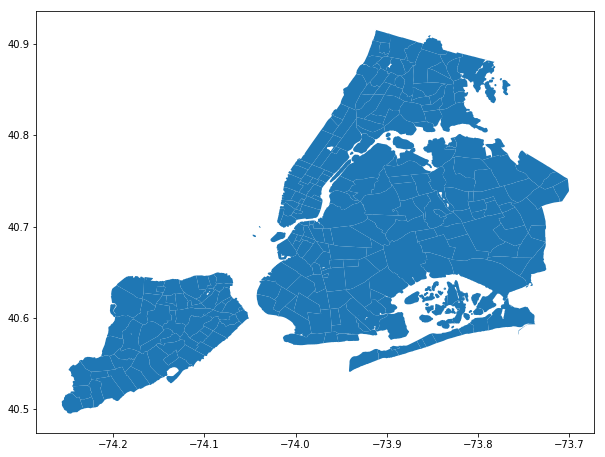

In [18]:
nyc.plot()
plt.show()

In [19]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 28 columns):
Unnamed: 0           1458644 non-null int64
pickup_datetime      1458644 non-null object
dropoff_datetime     1458644 non-null object
passenger_count      1458644 non-null int64
pickup_longitude     1458644 non-null float64
pickup_latitude      1458644 non-null float64
dropoff_longitude    1458644 non-null float64
dropoff_latitude     1458644 non-null float64
trip_duration        1458644 non-null object
date                 1458644 non-null object
station_num          1458644 non-null object
station_name         1458644 non-null object
station_latitude     1458644 non-null float64
station_longitude    1458644 non-null float64
average_wind         1458644 non-null float64
precipitation        1458644 non-null float64
snowfall             1458644 non-null float64
snow_depth           1458644 non-null float64
avg_temp             1458644 non-null float64
max_temp             14

In [20]:
#Remove column that stores duplicate index
taxis = taxis.iloc[:,1:]

In [21]:
print(taxis.head())

       pickup_datetime     dropoff_datetime  passenger_count  \
0  2016-03-14 17:24:55  2016-03-14 17:32:30                1   
1  2016-06-12 00:43:35  2016-06-12 00:54:38                1   
2  2016-01-19 11:35:24  2016-01-19 12:10:48                1   
3  2016-04-06 19:32:31  2016-04-06 19:39:40                1   
4  2016-03-26 13:30:55  2016-03-26 13:38:10                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0           -73.982           40.768            -73.965            40.766   
1           -73.980           40.739            -73.999            40.731   
2           -73.979           40.764            -74.005            40.710   
3           -74.010           40.720            -74.012            40.707   
4           -73.973           40.793            -73.973            40.783   

               trip_duration        date  station_num  \
0  0 days 00:07:35.000000000  2016-03-14  USW00014732   
1  0 days 00:11:03.000000000  2016-06-

In [22]:
#Set index to datetime of pickup
taxis['pickup_datetime'] = pd.to_datetime(taxis['pickup_datetime'])
datetime_ind = list(taxis['pickup_datetime'])
taxis.index = datetime_ind

In [24]:
#While we're at it, pair the datetimes with their respective days of the week
day_of_week = [x.weekday() for x in datetime_ind]
taxis['day_of_week'] = day_of_week

In [26]:
#Create a separate column with the names of the weekdays in case they're needed later
weekday_dict = {0: 'Monday',
               1: 'Tuesday',
               2: 'Wednesday',
               3: 'Thursday',
               4: 'Friday',
               5: 'Saturday',
               6: 'Sunday'}
taxis['weekday_name'] = taxis['day_of_week'].map(weekday_dict)

In [27]:
taxis['day_of_week'] = taxis['day_of_week'].astype('category').cat.as_ordered()
taxis['weekday_name'] = taxis['weekday_name'].astype('category')

In [28]:
#Set drop off to datetime and re-calculate trip duration as TimeDelta
taxis['dropoff_datetime'] = pd.to_datetime(taxis['dropoff_datetime'])
taxis['trip_duration'] = taxis['dropoff_datetime'] - taxis['pickup_datetime']

In [29]:
geometry = [Point(xy) for xy in zip(taxis['pickup_longitude'], taxis['pickup_latitude'])]
crs = {'init': 'epsg:4326'}
taxis = gpd.GeoDataFrame(taxis, crs=crs, geometry=geometry)

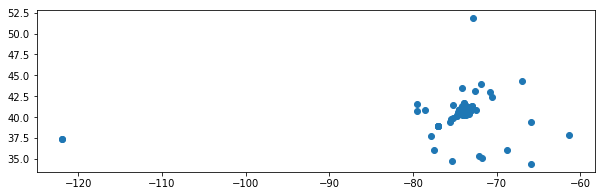

In [32]:
taxis.plot()
plt.show()

Some of the pickup coordinates appear to be outside of the NYC metro area entirely. Are these valid transactions?

In [46]:
xmin = -74.3
xmax = -73.72
ymin = 40.47
ymax = 40.92
longitude_limits = (taxis['pickup_longitude'] > xmin) & (taxis['pickup_longitude'] < xmax)
latitude_limits = (taxis['pickup_latitude'] > ymin) & (taxis['pickup_latitude'] < ymax)

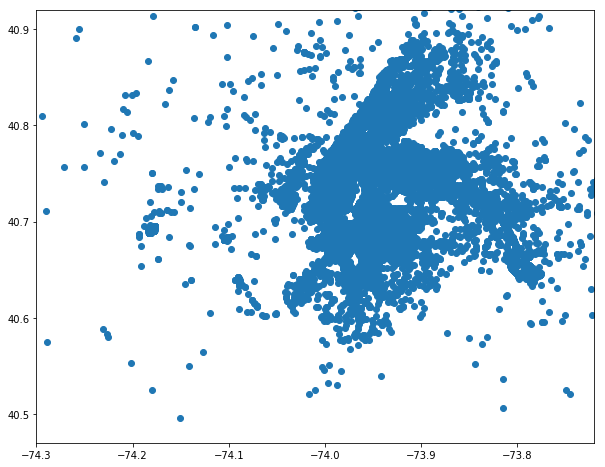

In [35]:

taxis.plot()
plt.axis([xmin, xmax, ymin, ymax])
plt.show()

In [ ]:
taxis['weekday_type'] = 

In [ ]:
print(taxis.info())

In [ ]:
monthly_count = taxis['pickup_datetime'].resample('M').count()

In [ ]:
months = monthly_count.index
month_labels = months.strftime('%b')

In [ ]:
import matplotlib.pyplot as plt
plt.plot(monthly_count)
plt.xticks(months, month_labels)
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.title('Total Yellow Cab Trips by Month')
plt.show()

In [ ]:
daily_trips = taxis['pickup_datetime'].resample('D').count()

In [ ]:
smoothed_7d = daily_trips.rolling(window=7).mean()

In [ ]:
smoothed_30d = daily_trips.rolling(window=30).mean()

In [ ]:
plot1, = plt.plot(daily_trips, color='red')
plot2, = plt.plot(smoothed_7d, color='blue')
plot3, = plt.plot(smoothed_30d, color='green')
plt.xlabel('Month')
plt.ylabel('Total Daily Trips')
plt.title('Daily Taxi Trips')
plt.legend([plot1, plot2, plot3], ['Daily Trips','Rolling 7D Avg','Rolling 30D Avg'], loc='lower right')
plt.show()

Taxi demand was unusually low one day in January and one day in late May.

In [ ]:
#Find outlier in January
print(daily_trips.loc['2016-01'])

In [ ]:
#Check weather for January 23rd
print(taxis.loc['2016-01-23'].iloc[:,-18:])

A large snow storm on January 23rd caused many people to stay inside. Additionally, it was a Saturday which meant fewer people were obligated to go anywhere.

In [ ]:
#Find outlier in late May
print(daily_trips.loc['2016-05'])

In [ ]:
#Weather on May 30
print(taxis.loc['2016-05-30'].iloc[:,-18:])

A quick Google search reveals that May 30, 2016 was Memorial Day!

In [ ]:
#Filter down to weekdays and run hourly analysis
hourly_trips = taxis.loc[taxis['weekday_type'] == True, 'pickup_datetime'].resample('H').count()

In [ ]:
hourly_trips = hourly_trips.loc[hourly_trips > 0]

In [ ]:
hours = []
for idx, trip in hourly_trips.items():
    hours.append(idx.hour)

In [ ]:
print(hours[:50])

In [ ]:
print(hourly_trips[:50])